In [41]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [42]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [43]:
len(X_train),len(X_test)

(60000, 10000)

In [44]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [45]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

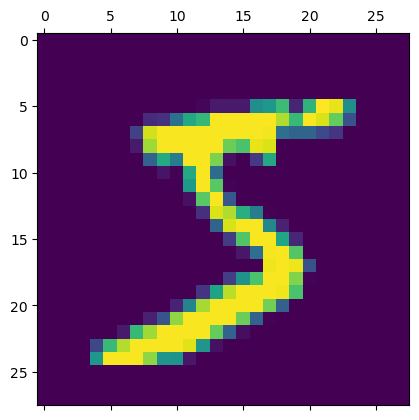

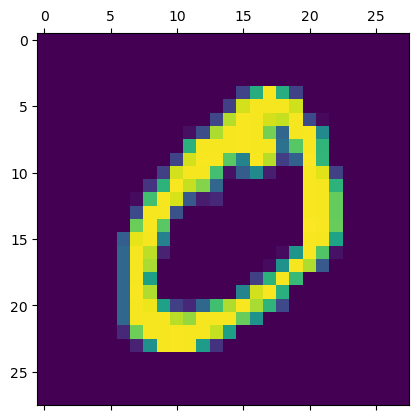

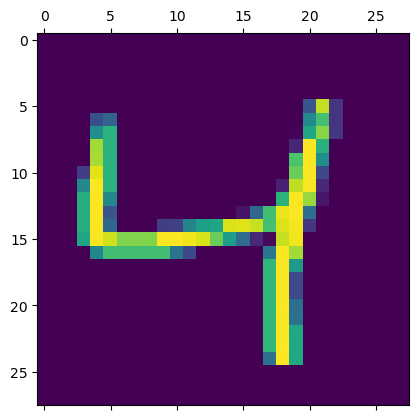

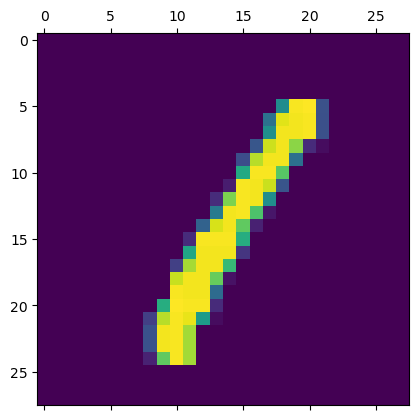

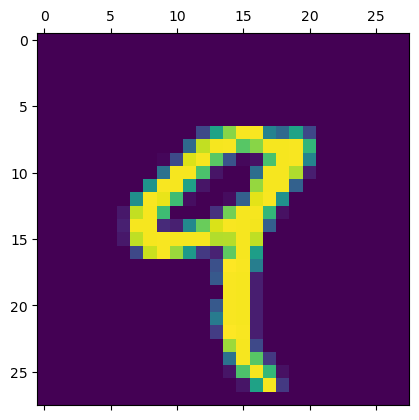

In [46]:
for num in range(5):
    plt.matshow(X_train[num])
    plt.show()

In [47]:
X_train.shape

(60000, 28, 28)

## Scaling the Dataset

In [48]:
X_train = X_train/255
X_test = X_test/255

### Flattening the train data and test data

In [49]:
X_train_flattened = X_train.reshape(len(X_train),X_train.shape[1]*X_train.shape[2])
X_test_flattened = X_test.reshape(len(X_test),X_test.shape[1]*X_test.shape[2])

In [50]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [51]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Training the Neural Networks

In [52]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8113 - loss: 0.7226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9138 - loss: 0.3079
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9190 - loss: 0.2854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.2715
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9254 - loss: 0.2649


In [53]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.3062    


[0.27068495750427246, 0.9244999885559082]

In [54]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([2.5325064e-02, 2.0527084e-07, 4.2648636e-02, 9.7683692e-01,
       3.4611514e-03, 1.1762681e-01, 1.9718268e-06, 9.9986291e-01,
       1.7064117e-01, 7.1240413e-01], dtype=float32)

In [55]:
y_pred[1]

array([3.8016540e-01, 3.5876383e-03, 9.9910551e-01, 3.6919627e-01,
       9.7248420e-10, 7.9425168e-01, 8.9162564e-01, 2.2283887e-12,
       1.6659710e-01, 4.4887347e-09], dtype=float32)

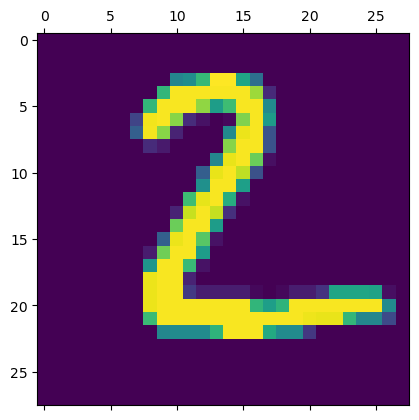

In [56]:
plt.matshow(X_test[1])

In [57]:
import numpy as np
np.argmax(y_pred[1])

2

In [58]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    5,   10,    2,    2,    0],
       [   0, 1105,    3,    2,    0,    1,    4,    2,   18,    0],
       [   7,    8,  899,   21,   10,    5,   13,   14,   52,    3],
       [   2,    0,    8,  936,    1,   16,    2,   12,   28,    5],
       [   1,    1,    2,    1,  921,    0,   12,    6,   10,   28],
       [   8,    1,    2,   42,   11,  760,   14,   10,   38,    6],
       [   7,    3,    4,    1,    8,   12,  916,    2,    5,    0],
       [   1,    5,   18,    8,    7,    0,    0,  959,    4,   26],
       [   6,    3,    5,   18,    9,   19,    8,   11,  889,    6],
       [   9,    5,    1,    9,   39,    5,    1,   24,   15,  901]])>

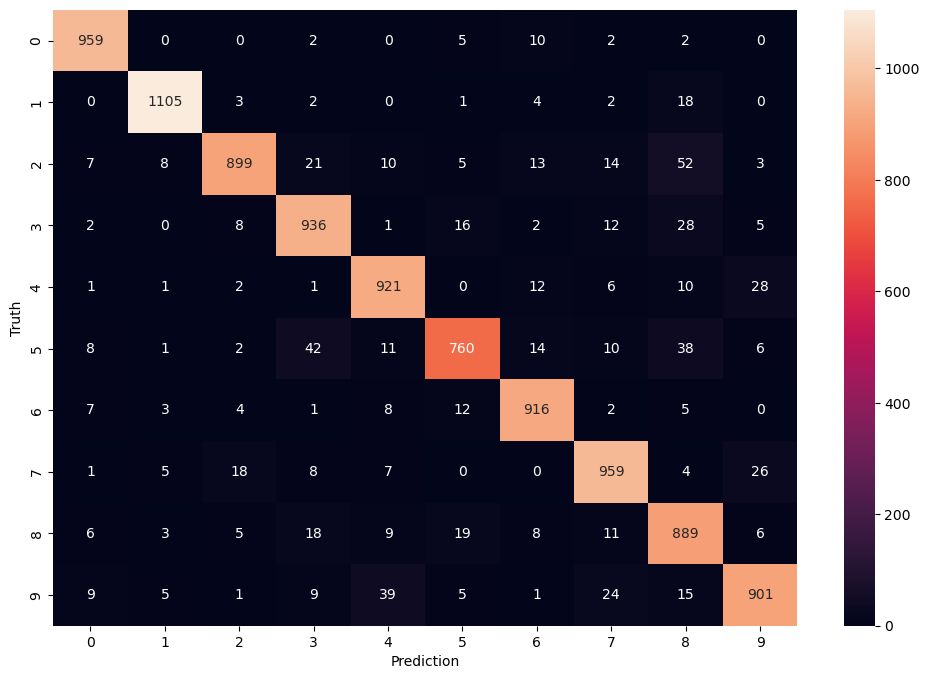

In [60]:
import seaborn as sb

plt.figure(figsize=(12,8))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [61]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8716 - loss: 0.4575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9619 - loss: 0.1291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.0897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0520


In [62]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0909


[0.07800862938165665, 0.9758999943733215]

In [63]:
y_pred = model.predict(X_test_flattened)
y_pred_ind = [np.argmax(i) for i in y_pred]
y_pred_ind[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


[7, 2, 1, 0, 4]

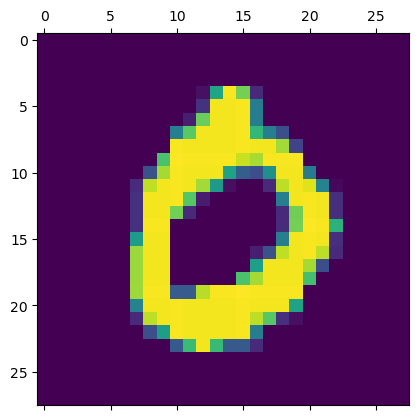

In [64]:
plt.matshow(X_test[3])
plt.show()

In [65]:
cm_1 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_ind)
cm_1


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    3,    1,    1,    1,    1,    1,    3,    2],
       [   0, 1124,    5,    0,    0,    1,    1,    0,    4,    0],
       [   2,    1, 1016,    3,    0,    0,    1,    7,    2,    0],
       [   1,    0,    4,  989,    0,    5,    0,    5,    4,    2],
       [   0,    1,    4,    0,  960,    0,    5,    2,    2,    8],
       [   3,    0,    1,   10,    2,  860,    3,    1,   11,    1],
       [   6,    3,    1,    1,   11,    7,  925,    0,    4,    0],
       [   0,    9,   13,    0,    1,    0,    0,  998,    0,    7],
       [   5,    0,    6,    3,    3,    2,    4,    4,  943,    4],
       [   3,    4,    0,    6,    8,    1,    1,    4,    5,  977]])>

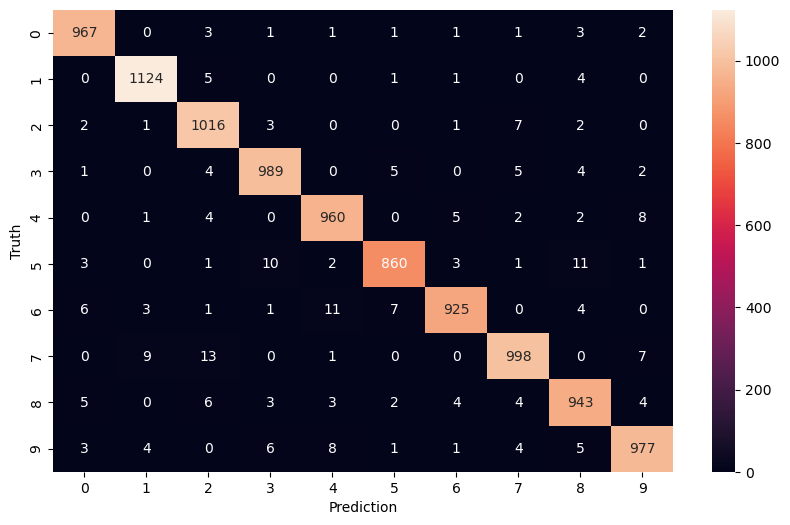

In [66]:
plt.figure(figsize=(10,6))
sb.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

"""So your network really looks like this:
Input layer → 784 neurons (created automatically from Flatten(input_shape=(28,28)))
Hidden layer → 100 neurons (ReLU)
Output layer → 10 neurons (Sigmoid/Softmax)
"""
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8711 - loss: 0.4557
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9597 - loss: 0.1417
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0523


In [69]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0847    


[0.0733591616153717, 0.9778000116348267]

In [70]:
y_pred = model.predict(X_test)
y_pred_places = [np.argmax(i) for i in y_pred]
y_pred_places[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


[7, 2, 1, 0, 4]

In [71]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

"""So your network really looks like this:
Input layer → 784 neurons (created automatically from Flatten(input_shape=(28,28)))
Hidden layer → 100 neurons (ReLU)
Output layer → 10 neurons (Sigmoid/Softmax)
"""
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7315 - loss: 1.0535
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9007 - loss: 0.3610
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9152 - loss: 0.2992
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9252 - loss: 0.2660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9294 - loss: 0.2493


In [76]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,512 (310.60 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

"""So your network really looks like this:
Input layer → 784 neurons (created automatically from Flatten(input_shape=(28,28)))
Hidden layer → 100 neurons (ReLU)
Output layer → 10 neurons (Sigmoid/Softmax)
"""
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam',histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8692 - loss: 0.4613
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9629 - loss: 0.1313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9740 - loss: 0.0858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9815 - loss: 0.0625
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0502
